In [2]:
import pandas as pd
import os, pickle

# Well Segmentation
start_date = pd.Timestamp(2018,1,1)
end_date   = pd.Timestamp(2019,1,1)

cwd = os.getcwd()
os.chdir("..")
data_dir = os.getcwd() + "\\data\\data_train\\"
os.chdir(cwd)

import datetime
# import matplotlib
# import matplotlib.pyplot as plt
# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)        

# import seaborn as sns

from source import data_module



In [5]:
from source import data_module


RMT = 'ESOZ'

failureDataSetName = RMT + 'failureData.pkl'

incomplete_wells = data_module.prepare_train_data(RMT, data_dir, start_date, end_date, failureDataSetName)


No filter pass. all wells selected


C:\Users\evaziyam\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


sliding-window calculations...


#                                            PUMP FAILURE:         TRAIN ML MODEL

df-len=2700
new df-len=2700
df-len=310


C:\Users\evaziyam\PycharmProjects\Pump-Failure-Prediction\source\failure_machine_learning.py:453: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ml_df.dropna(axis='rows', inplace=True)


new df-len=310

 *** RUNNING RANDOM SAMPLE # 1 *** 

# columns: 113
# examples: training=2700  test=310
# training positives   = 0.1
# test positives   = 0.1
Applying RF algorithm ... 

Model Report
Test Accuracy : 0.9
Test Recall score: 0.00
Test Precision score: 0.00
Test ROC-AUC Score : 0.817956
Test score = 0.90
Test average precision-recall score: 0.10


C:\Users\evaziyam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


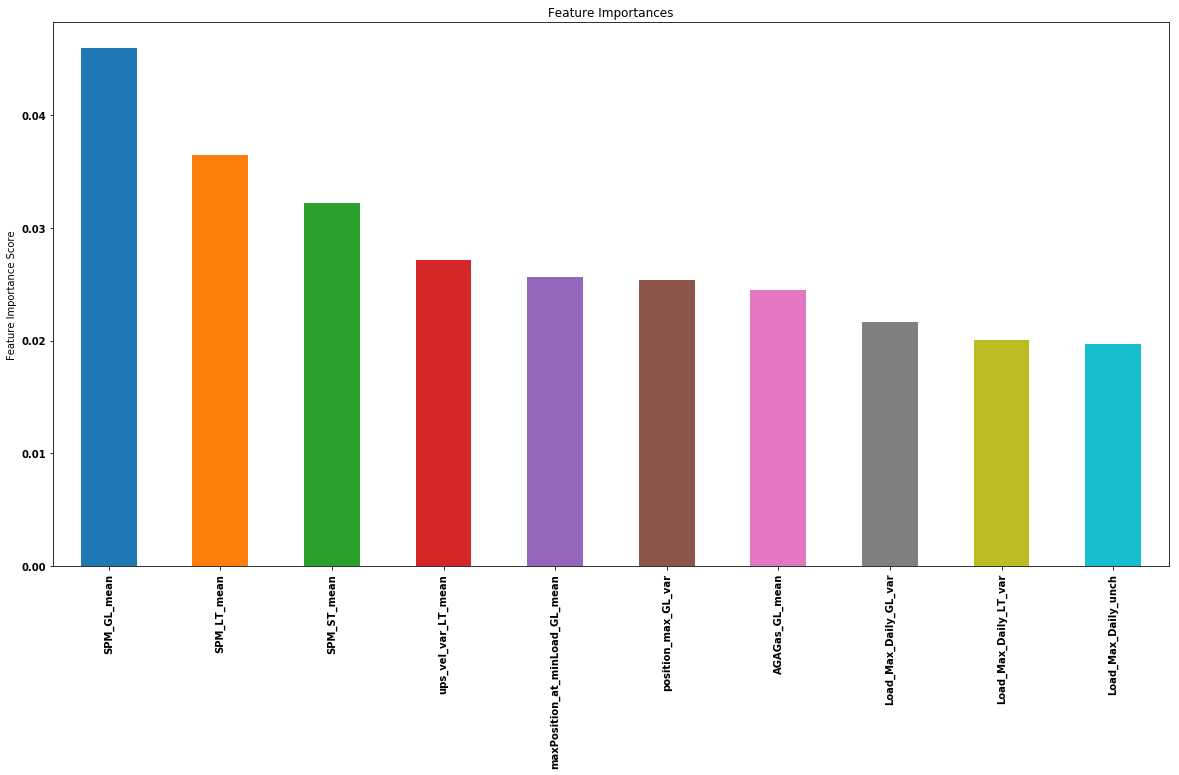

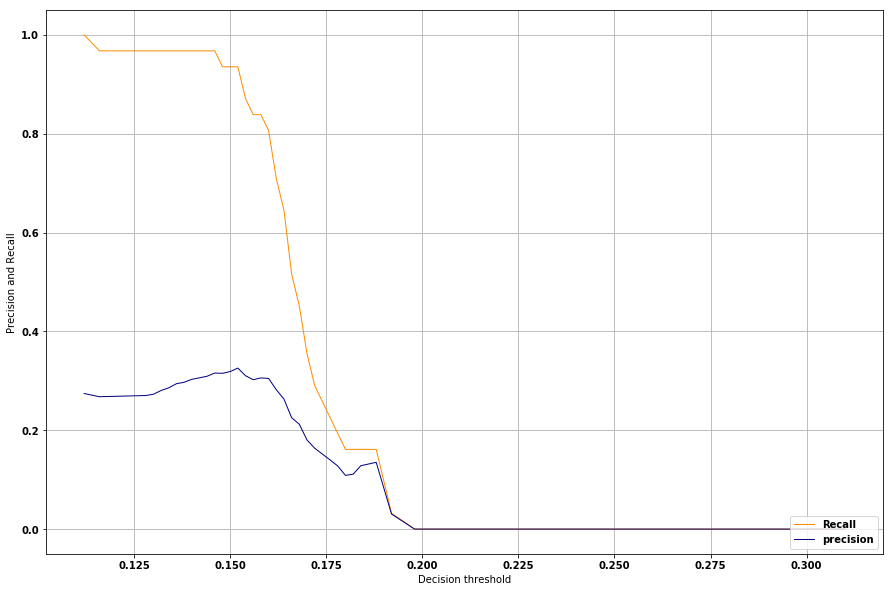

Precision & Recall Intersection = [0.0]


In [11]:
# import train_module, importlib
# importlib.reload(train_module)

from source import train_module


# failureDataSetName = 'failureDataset_1Df_1D.pkl'


RMT_list = ['ESOZ']

# failureDataSetName='_failureDataset_6stat_pureSlide_new.pkl'
# failureDataSetName='_failureDataset_1Df_1D_early.pkl'
# failureDataSetName='_failureDataset_1Df_1D_gradSlide.pkl'
failureDataSetName = 'failureData.pkl'


FailMode = 'PUMP'

RMT = 'ESOZ'

# training_model_save_name = RMT + FailMode + failureDataSetName[:-4] + 'RF_trainedModel.pkl'

# trainOpts_ml = {'model_type':'ML',
#                 'data_dir':data_dir,
#                 'RMT_LIST':RMT_list,
#                 'input_data_name':failureDataSetName,
#                 'model_save_name':training_model_save_name,
#                 'run_split':True,
#                 'pre_fail_days':30,
#                 'lurning_curve':False,
#                 'plot_loss':True}

# # 'ROD PUMP FAILURE': ['SANDED', 'LOW PRODUCTION']
# # 'TUBING FAILURE (LEAK)':[]
# # 'CENSORED': ['CENSORED'],

# configs_ml = { 'seg_filter':{'ROD PUMP FAILURE': ['SANDED', 'LOW PRODUCTION'],
#                             'CENSORED': ['CENSORED'] },
#               'YLABEL':'Target',
#                 'drop_cols_x':['Target'],                    
#                 'val_size': 0.2,
#                 'holdout': 0.02,
#                 'fail_ratio':0.1,
#                 'n_samples':100000 }

run_model = True
if run_model:
    ml_models, model_pars_ml = train_module.train_failure_model(RMT, data_dir, failureDataSetName)
else:
    model_save_name = data_dir + trainOpts_ml['model_save_name']
    with open(model_save_name, 'rb') as f:
        ml_models, model_pars_ml = pickle.load(f)
        
        


# ML Model Selection, Testing & Save

 [ESOZ_37] 04030546210000 [Primary = CENSORED, Secondary=CENSORED ]
100
date_vec: 107
t_valid 100
y_pred 100


C:\Users\evaziyam\PycharmProjects\Pump-Failure-Prediction\source\failure_machine_learning.py:551: SettingWithCopyWarning: modifications to a property of a datetimelike object are not supported and are discarded. Change values on the original.
  days_int[0] = 1
C:\Users\evaziyam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


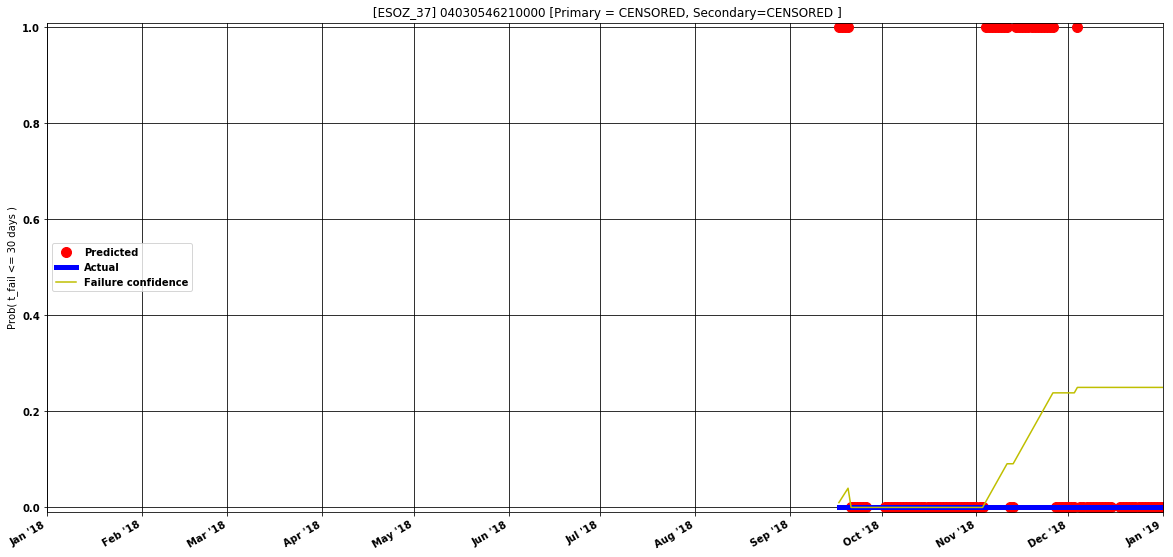

In [10]:
import pickle

verified_model_save_name = RMT + failureDataSetName[:-4] + 'RF_verifiedModel.pkl'

failure_decision_pars = {'decision_threshold': 0.1,
                      'days_to_failure': 30,
                      'max_delta_days': 50  ,
                      'alarm_confidence':0.5,
                      'min_diffConfidence': 0.5,
                      'days_to_reset_cumFailDays':30}

date_lim = [start_date, end_date]
trainOpts_ml = {'data_dir':data_dir,
                'input_data_name':failureDataSetName,
                'save_trained_model':True,
                'trained_model_name':verified_model_save_name,
                'plot_test':True}

model_ml = ml_models[0]
if 'Target' in model_pars_ml['columns_all']:
    model_pars_ml['columns_all'].remove('Target')
    

train_module.test_trained_failure_model(model_ml, model_pars_ml, failure_decision_pars,  trainOpts_ml, date_lim)       


# ***************************************************************************************